# Задача

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.


# Подсказка


Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare.

Часть открытых данных есть, например, на сайте archive.org:

https://archive.org/details/201309_foursquare_dataset_umn

Скачаем любым удобным образом архив fsq.zip с этой страницы.

Нас будет интересовать файл checkins.dat. Для экономии времени Вы можете его [скачать с Google  Disk](https://drive.google.com/file/d/1H5Fz27ABa8T8LfvasqJtNtZiP_0B_dpK/view?usp=sharing) и загрузить себе в желтую папку Google Colab

# Решение

**--ЧАСТЬ 1--**


Подгружаем Google Диск

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Подгружаю исходный файл с данными


In [2]:
# введите переменную path и учажите ее значение, чтобы загрузить из Google-диска файл в Pandas DataFrame: checkins.dat.
path = "checkins.dat"

import pandas as pd
from io import StringIO

df = pd.read_csv(path, 
                 sep="\|\s+", 
                 skiprows=2,
                 names=['id', 'user_id', 'venue_id', 'latitude', 'longitude', 'created_at'],
                 engine='python')

df

,id,user_id,venue_id,latitude,longitude,created_at
0,984301,2041916.0,5222.0,NaN,NaN,2012-04-21 17:39:01
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
2,984315,1764391.0,5222.0,NaN,NaN,2012-04-21 17:37:18
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
4,984249,2146840.0,5222.0,NaN,NaN,2012-04-21 17:42:58
...,...,...,...,...,...,...
1021962,956119,1139114.0,29488.0,42.439479,-83.743830,2012-04-13 11:36:44
1021963,956447,2088020.0,4432.0,NaN,NaN,2012-04-13 12:58:05
1021964,956733,960666.0,60.0,42.331427,-83.045754,2012-04-13 21:56:19
1021965,957139,1771518.0,10935.0,NaN,NaN,2012-04-14 02:44:52


**--ЧАСТЬ 2--**

Удалим строки, не содержащие координат — они неинформативны для нас:

In [3]:
ourdata = pd.DataFrame()
# удалите строки, в которых нет информации про координаты через фукнцию dropna
ourdata = df.dropna()

print('Shape without NaN: %s' % str(ourdata.shape))
ourdata.head()
ourdata

Shape without NaN: (396634, 6)


,id,user_id,venue_id,latitude,longitude,created_at
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
7,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
9,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
10,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18
...,...,...,...,...,...,...
1021959,955561,626076.0,20073.0,40.850100,-73.866246,2012-04-13 09:56:48
1021960,955892,674797.0,2297.0,33.748995,-84.387982,2012-04-13 10:56:03
1021961,956377,845102.0,11195.0,42.765366,-71.467566,2012-04-13 12:08:45
1021962,956119,1139114.0,29488.0,42.439479,-83.743830,2012-04-13 11:36:44


Если Вы сделали все правильно, то Вы получите датасет из 396634 строк. На таком количестве кластеризация будет работать долго. Быть очень терпеливым не возбраняется — результат от этого только улучшится. Но для того, чтобы сделать задание, понадобится сабсет из первых 100 тысяч строк. Это компромисс между качеством и затраченным временем. Обучение алгоритма на всём датасете занимает около часа, а на 100 тыс. строк — примерно 2 минуты, однако этого достаточно для получения корректных результатов.

In [4]:
# обрежьте массив до первых 100 000 строк и сохраните в переменную X, с которой далее будете работать
X = ourdata.iloc[:100000, :]
X = X[['latitude', 'longitude']]
X

,latitude,longitude
1,38.895112,-77.036366
3,33.800745,-84.410520
7,45.523452,-122.676207
9,40.764462,-111.904565
10,33.448377,-112.074037
...,...,...
233788,33.575000,-117.725556
233789,37.629349,-122.400087
233793,29.762884,-95.383061
233797,32.802955,-96.769923


**--ЧАСТЬ 3--**

Теперь необходимо кластеризовать данные координаты, чтобы выявить центры скоплений туристов. Поскольку баннеры имеют сравнительно небольшую площадь действия, нам нужен алгоритм, позволяющий ограничить размер кластера и не зависящий от количества кластеров. Используем плотностной алгоритм MeanShift, указав bandwidth=0.1, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах.

In [48]:
print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using

# на базе примера из https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html определите ms как алгоритм MeanShift с параметром bandwidth 0.1
bandwidth = 0.1

%%timeit
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Количество найденных кластеров : %d" % n_clusters_)


Automatically created module for IPython interactive environment
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
Количество найденных кластеров : 3231


**--ЧАСТЬ 4--**

Визуализация данных

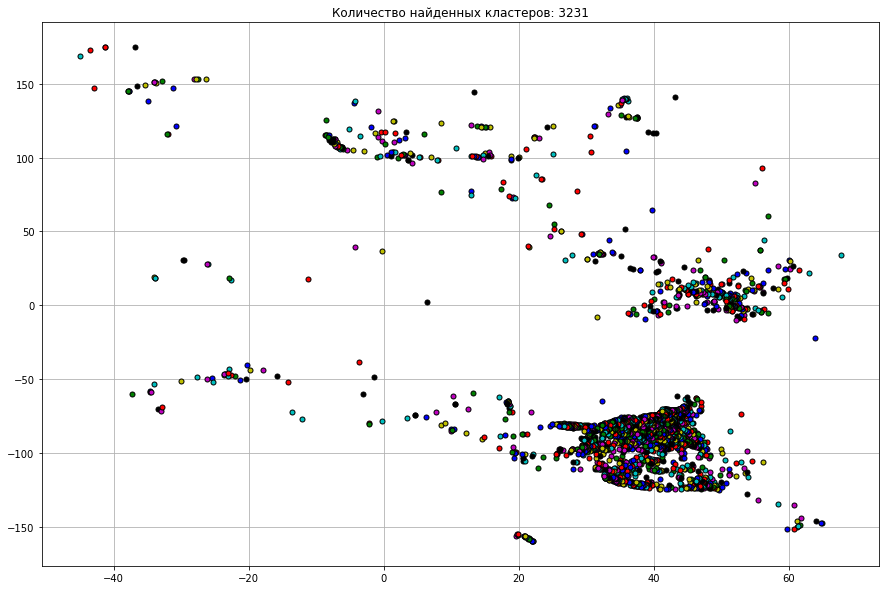

In [30]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
CentersAllData = pd.DataFrame(columns=['latitude', 'longitude', 'numbers of elements'])

plt.figure(figsize=(15,10))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    cluster_center = cluster_centers[k]
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5)
    plt.grid()
    
plt.title('Количество найденных кластеров: %d' % n_clusters_)

plt.show()



Выберим центры, в которых больше всего людей

In [31]:
VolumeOfCenters = pd.DataFrame(columns=['cluster','volume'])

for k in range(len(cluster_centers)):
    sumlabels = (labels==k).sum()
    VolumeOfCenters = VolumeOfCenters.append({'cluster': k,'volume':sumlabels}, ignore_index=True)

print(VolumeOfCenters)

     cluster volume
0          0  12506
1          1   4692
2          2   3994
3          3   3363
4          4   3526
...      ...    ...
3226    3226      1
3227    3227      1
3228    3228      1
3229    3229      1
3230    3230      1

[3231 rows x 2 columns]


In [32]:
SingificantCenters = VolumeOfCenters.sort_values('volume', ascending=False)
pd.DataFrame(SingificantCenters.iloc[:20,0])

,cluster
0,0
1,1
2,2
4,4
3,3
5,5
6,6
7,7
8,8
9,9


**--ЧАСТЬ 5--**

Формируем финальный список список координат центров с наибольшим объемом популяции

In [51]:
for k in range(0,20):
    index = SingificantCenters.iloc[k,0]
    print ('Координаты центра (долгота и широта):',cluster_centers[index,0].tolist(),',', 
           cluster_centers[index,1].tolist(),'\tОбъем людей в центре: ',
           SingificantCenters.iloc[k,1])

Координаты центра (долгота и широта): 33.357344562325096 , -111.82265410760392 	Объем людей в центре:  17914
Координаты центра (долгота и широта): 37.68868157406161 , -122.40933037359147 	Объем людей в центре:  11909
Координаты центра (долгота и широта): 30.26718361698159 , -97.74311928133027 	Объем людей в центре:  6182
Координаты центра (долгота и широта): 36.117229142990276 , -115.17107342280688 	Объем людей в центре:  5739
Координаты центра (долгота и широта): 39.735830152625304 , -104.98658042770822 	Объем людей в центре:  4415
Координаты центра (долгота и широта): 40.71771639727507 , -73.9918354198967 	Объем людей в центре:  4000
Координаты центра (долгота и широта): 33.44943805020126 , -112.00213969017547 	Объем людей в центре:  2183
Координаты центра (долгота и широта): 33.76663623218336 , -84.39328918481657 	Объем людей в центре:  2163
Координаты центра (долгота и широта): 34.13146014917951 , -118.11801180610205 	Объем людей в центре:  1989
Координаты центра (долгота и широта)

Чтобы увидеть получившиеся результаты на карте можно передать центры получившихся кластеров в один из инструментов визуализации. Например, сайт [mapcustomizer.com](https://www.mapcustomizer.com/) имеет функцию Bulk Entry, куда можно вставить центры полученных кластеров в формате

In [54]:
coordinates_ms = []
for k in range(0,20):
    index_ms = SingificantCenters.iloc[k,0]
    print (cluster_centers[index_ms,0].tolist(),',',cluster_centers[index_ms,1].tolist())
    coordinates_ms.append((cluster_centers[index_ms, 0].tolist(),
                         cluster_centers[index_ms, 1].tolist()))

33.357344562325096 , -111.82265410760392
37.68868157406161 , -122.40933037359147
30.26718361698159 , -97.74311928133027
36.117229142990276 , -115.17107342280688
39.735830152625304 , -104.98658042770822
40.71771639727507 , -73.9918354198967
33.44943805020126 , -112.00213969017547
33.76663623218336 , -84.39328918481657
34.13146014917951 , -118.11801180610205
32.71134443394278 , -117.15363874791043
32.80302053531547 , -96.76989743494408
40.725809639354814 , -74.29919603935461
40.984718398888894 , -73.77423909722224
44.962034067796594 , -93.11910779660994
35.22726338097585 , -80.84318161707374
38.645525337999786 , -90.22935878999974
47.60624471741767 , -122.33204382627093
41.25352750000007 , -95.9993827781608
40.759599954773876 , -111.89607777939733
38.8861652155993 , -77.04878333074303


**--ЧАСТЬ 6--**

Сформулируйте Ваши рекомендации по местам размещения рекламных баннеров. Какую информацию еще важно получить/проработать для повышения качества рекомендации?

**--ЧАСТЬ 7--**

Для получения оценки в 6-7 баллов помимо заданий из частей 1-6 реализуйте также кластеризацию данных через [DBScan](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) и сравните полученные кластеры по методу MeanShift.

In [11]:
# реализуйте DBScan для используемых в задаче данных

# Советую почитать
- 1) [Рассказывается про сам алгоритм и как подбирать параметры minpts и eps](https://habr.com/ru/post/322034/)
- 2) [Нативное описание работы DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

In [37]:
from sklearn.cluster import DBSCAN

dbcan = DBSCAN(eps=0.1, min_samples=5).fit(X)
labels = dbcan.labels_
cluster_centers = dbcan.components_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Количество найденных кластеров : %d" % n_clusters_)

Количество найденных кластеров : 910


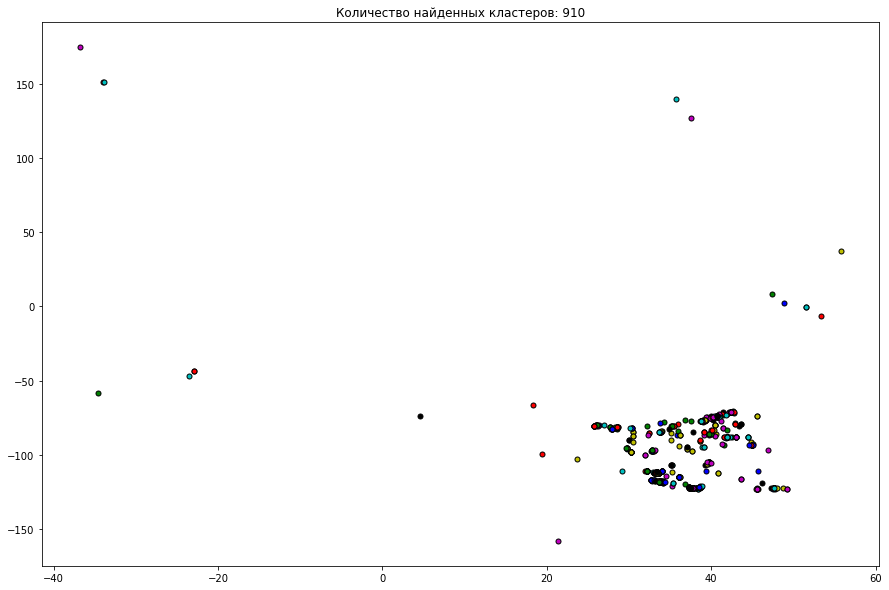

In [38]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
CentersAllData = pd.DataFrame(columns=['latitude', 'longitude', 'numbers of elements'])

plt.figure(figsize=(15,10))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    cluster_center = cluster_centers[k]
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5)
    plt.grid()
    
plt.title('Количество найденных кластеров: %d' % n_clusters_)
plt.show()


In [39]:
VolumeOfCenters = pd.DataFrame(columns=['cluster','volume'])

for k in range(len(cluster_centers)):
    sumlabels = (labels==k).sum()
    VolumeOfCenters = VolumeOfCenters.append({'cluster': k, 'volume':sumlabels}, ignore_index=True)

print(VolumeOfCenters)

      cluster volume
0           0   4000
1           1   2183
2           2    594
3           3    260
4           4  11909
...       ...    ...
96245   96245      0
96246   96246      0
96247   96247      0
96248   96248      0
96249   96249      0

[96250 rows x 2 columns]


In [42]:
SingificantCenters = VolumeOfCenters.sort_values('volume', ascending=False)
pd.DataFrame(SingificantCenters.iloc[:20,0])

,cluster
6,6
4,4
13,13
10,10
15,15
0,0
1,1
7,7
47,47
22,22


In [43]:
for k in range(0,20):
    index = SingificantCenters.iloc[k,0]
    print ('Координаты центра:', cluster_centers[index,0].tolist(),'\t,', 
           cluster_centers[index,1].tolist(),'\t|  Объем людей в центре: ',
           SingificantCenters.iloc[k,1])

Координаты центра: 40.65 	, -73.95 	|  Объем людей в центре:  17914
Координаты центра: 33.4483771 	, -112.0740373 	|  Объем людей в центре:  11909
Координаты центра: 33.2486638 	, -111.6342993 	|  Объем людей в центре:  6182
Координаты центра: 33.4483771 	, -112.0740373 	|  Объем людей в центре:  5739
Координаты центра: 34.0522342 	, -118.2436849 	|  Объем людей в центре:  4415
Координаты центра: 38.8951118 	, -77.0363658 	|  Объем людей в центре:  4000
Координаты центра: 33.800745 	, -84.41052 	|  Объем людей в центре:  2183
Координаты центра: 33.4483771 	, -112.0740373 	|  Объем людей в центре:  2163
Координаты центра: 36.114646 	, -115.172816 	|  Объем людей в центре:  1989
Координаты центра: 38.8951118 	, -77.0363658 	|  Объем людей в центре:  1796
Координаты центра: 34.0489281 	, -111.0937311 	|  Объем людей в центре:  1304
Координаты центра: 32.735687 	, -97.1080656 	|  Объем людей в центре:  1231
Координаты центра: 33.4483771 	, -112.0740373 	|  Объем людей в центре:  1121
Коорд

In [45]:
coordinates_dbscan = []
for k in range(0,20):
    index_dbscan = SingificantCenters.iloc[k,0]
    coordinates_dbscan.append((cluster_centers[index_dbscan, 0].tolist(),
                         cluster_centers[index_dbscan, 1].tolist()))
    print(cluster_centers[index_dbscan, 0].tolist(),',',cluster_centers[index_dbscan, 1].tolist())

40.65 , -73.95
33.4483771 , -112.0740373
33.2486638 , -111.6342993
33.4483771 , -112.0740373
34.0522342 , -118.2436849
38.8951118 , -77.0363658
33.800745 , -84.41052
33.4483771 , -112.0740373
36.114646 , -115.172816
38.8951118 , -77.0363658
34.0489281 , -111.0937311
32.735687 , -97.1080656
33.4483771 , -112.0740373
38.4404674 , -122.7144314
33.4483771 , -112.0740373
41.6005448 , -93.6091064
42.3584308 , -71.0597732
33.4483771 , -112.0740373
38.5787965 , -122.5797054
32.2217429 , -110.926479


In [63]:
pd.DataFrame(coordinates_ms).to_csv("geo_ms.txt", index=False, header=False)
pd.DataFrame(coordinates_dbscan).to_csv("geo_dbscan.txt", index=False, header=False)

__Результаты обработки координат при помощи сервиса [mapcustomizer.com](https://www.mapcustomizer.com/) представлены ниже__

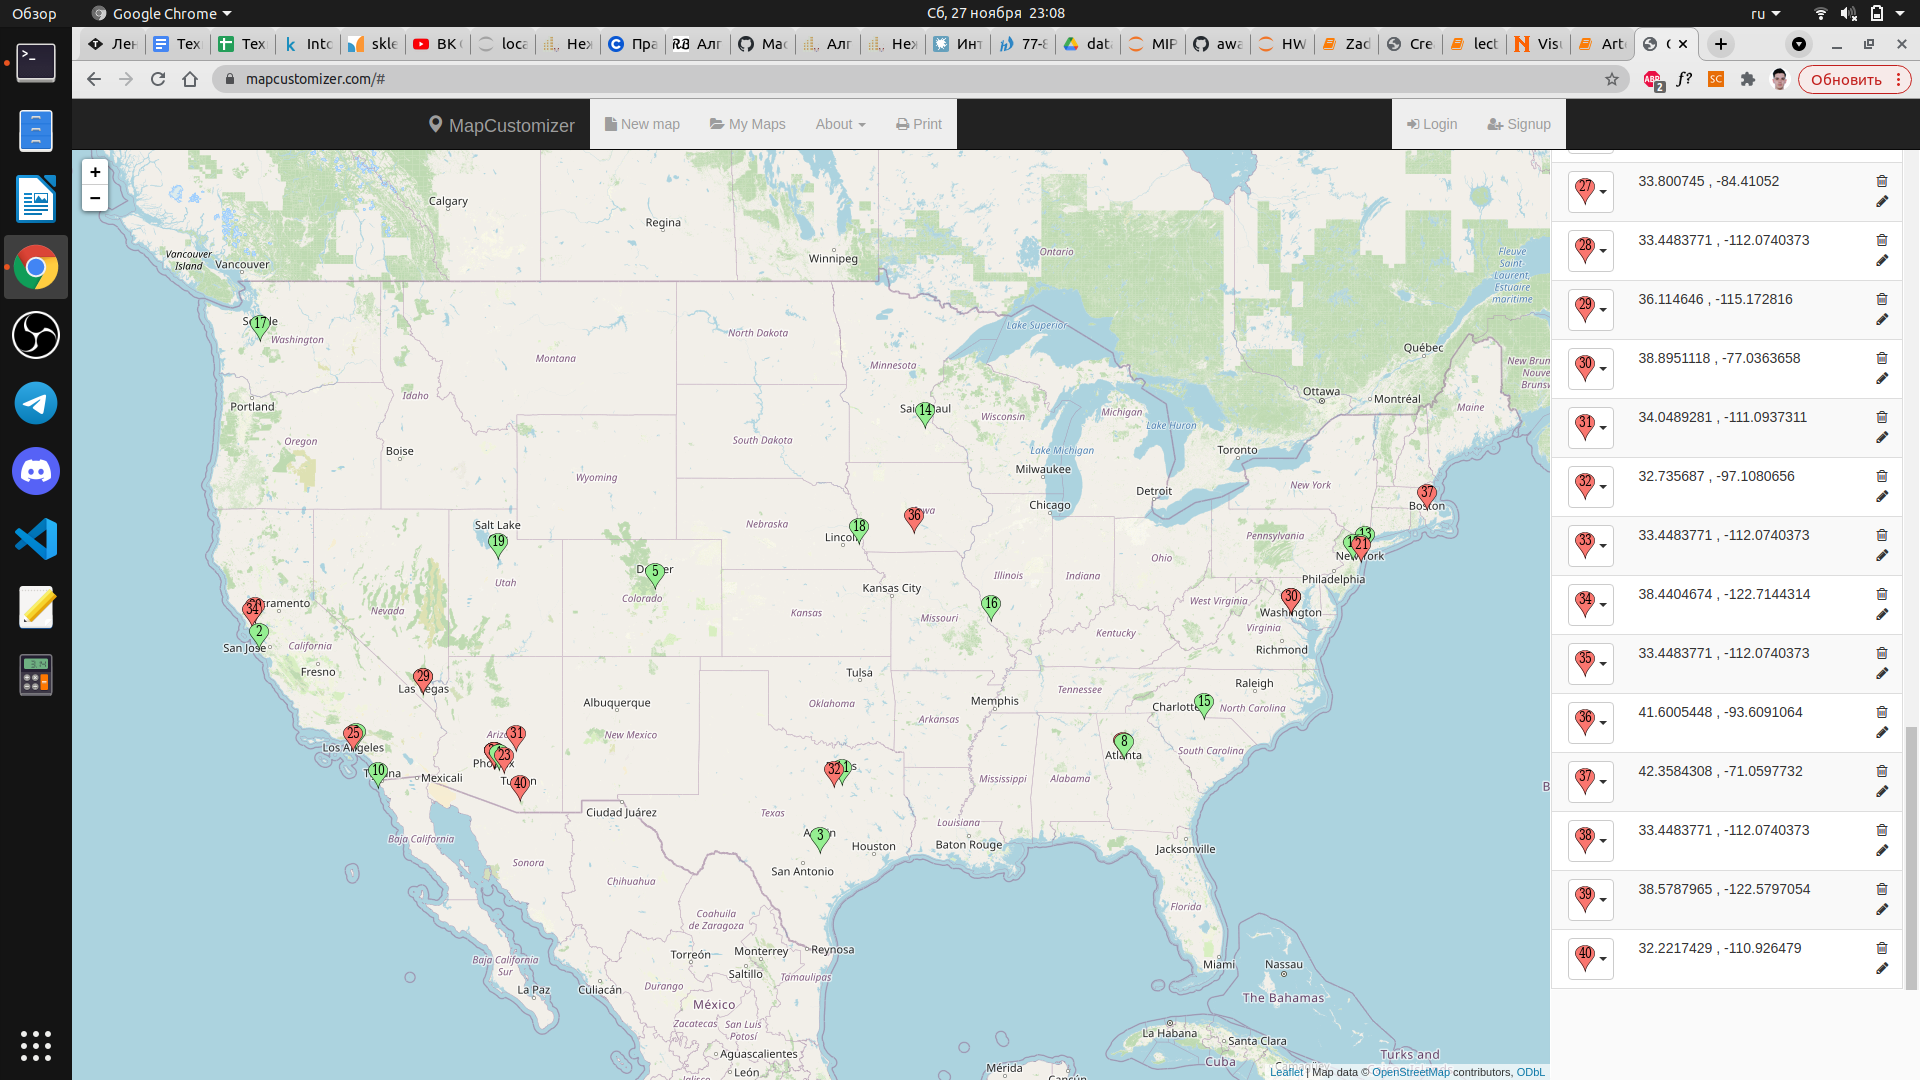

In [70]:
# зеленые - MeanShift, красные - DBSCAN
from IPython.display import Image
Image("MapCustomizer.png")

Как видно, алгоритмы дают погрешность в определии кластеров.
Это ожидаемо, так как в алгоритме DBSCAN мы не проводили подбор параметров minpts и eps из каких-либо соображений.

Для получения оценки в 8-10 баллов осуществите python-парсинг данных из информационного IT-портала Habr за последние 6 месяцев (за основу можно взять [этот скрипт web-кроллинга](https://github.com/awant/habr_crawler)). Проведите разведовательный анализ данных и выберите параметры для кластеризации статей по мере вовлеченности в них и оцените на какие кластеры по вовлеченности делятся публикации, а также сделайте маркетинговую интерпретацию особенностей каждого кластера.